<a href="https://colab.research.google.com/github/Suchithrareddyn/Electricity-Bills/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

#Data loading

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDA PROJECT/file.csv")
df

,Unnamed: 0,bill_id,account_id,billing_amount,current_balance,pay_cre_dt,due_dt,tender_type,tender_type_descr,has_email,bill_mailed,dwelling_type_desc,has_med_cert,is_equal_pay_acct,own_rent,is_renewable,is_web_registered,pge_account_months,pge_customer_months,premise_type_code,median_hh_income,median_age,avg_hh_size,gini_index,avg_hours_worked,median_monthly_housing_costs,perc_industry_agriculture_forestry,perc_industry_construction,perc_industry_manufacturing,perc_industry_wholesale_trade,perc_industry_retail_trade,perc_industry_transportation_utilities,perc_industry_information,perc_industry_finance_real_estate,perc_industry_prof_sci_mgmt_admin_waste,perc_industry_education_health_social,perc_industry_arts_ent_accom_food,perc_industry_other_services,perc_industry_public_admin,perc_hh_has_computing_devices,perc_hh_has_no_computing_devices,perc_educ_8th_grade,perc_educ_9th_grade,perc_educ_10th_grade,perc_educ_11th_grade,perc_educ_12th_grade_no_diploma,perc_educ_high_school_diploma,perc_educ_ged,perc_educ_1_yr_college_no_degree,perc_educ_multi_yr_college_no_degree,perc_educ_associates_degree,perc_educ_bachelors_degree,perc_educ_masters_degree,perc_educ_professional_degree,perc_educ_doctorate_degree,perc_pop_not_in_labor_force,perc_pop_in_civ_labor_force_unemp,perc_hh_type_family_married,perc_hh_type_single_parent,perc_hh_type_nonfamily_roommates,perc_hh_type_nonfamily_bach,perc_health_ins_private,perc_native,perc_foreign_natur,perc_foreign_noncit,perc_work_transp_car,perc_work_transp_public,perc_mortgage_has_mort_2nd_only,perc_mortgage_has_mort_heloc_only,perc_mortgage_has_mort_2nd_and_heloc,perc_mortgage_has_mort_no_2nd_no_heloc,perc_hh_workers_none,perc_hh_workers_1,perc_hh_workers_2,perc_hh_workers_3ormore,perc_poverty_lev_below,perc_hh_welfare_received,perc_hh_inc_to_pov_lev_0to0.5,perc_hh_inc_to_pov_lev_0.5to1,perc_hh_inc_to_pov_lev_1to1.25,perc_hh_inc_to_pov_lev_1.25to1.5,perc_hh_inc_to_pov_lev_1.5to1.85,perc_hh_inc_to_pov_lev_1.85to2,perc_hh_inc_to_pov_lev_2andover,late
0,0,0,0,97.23,-81.50,2018-12-11 16:03:51,2018-12-19 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU,72031.0,38.7,2.91,0.3443,37.2,1262.0,0.032565,0.094689,0.160321,0.029058,0.110721,0.021543,0.010020,0.034068,0.092685,0.237976,0.082164,0.056112,0.038076,0.944817,0.055183,0.001216,0.017018,0.003241,0.009319,0.011750,0.237034,0.051864,0.096029,0.161264,0.080227,0.216775,0.076175,0.009319,0.028768,0.307488,0.040846,0.655481,0.117823,0.046234,0.180462,0.064112,0.835249,0.055939,0.108812,0.910594,0.034625,0.027265,0.077397,0.0,0.578716,0.199105,0.367636,0.307979,0.12528,0.128834,0.111111,0.043456,0.085378,0.099949,0.034254,0.013548,0.012781,0.710634,0
1,1,1,0,86.02,-97.23,2019-01-10 16:03:54,2019-01-22 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU,72031.0,38.7,2.91,0.3443,37.2,1262.0,0.032565,0.094689,0.160321,0.029058,0.110721,0.021543,0.010020,0.034068,0.092685,0.237976,0.082164,0.056112,0.038076,0.944817,0.055183,0.001216,0.017018,0.003241,0.009319,0.011750,0.237034,0.051864,0.096029,0.161264,0.080227,0.216775,0.076175,0.009319,0.028768,0.307488,0.040846,0.655481,0.117823,0.046234,0.180462,0.064112,0.835249,0.055939,0.108812,0.910594,0.034625,0.027265,0.077397,0.0,0.578716,0.199105,0.367636,0.307979,0.12528,0.128834,0.111111,0.043456,0.085378,0.099949,0.034254,0.013548,0.012781,0.710634,0
2,2,2,0,82.94,-86.02,2019-02-11 16:04:24,2019-02-20 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU,72031.0,38.7,2.91,0.3443,37.2,1262.0,0.032565,0.094689,0.160321,0.029058,0.110721,0.021543,0.010020,0.034068,0.092685,0.237976,0.082164,0.056112,0.038076,0.944817,0.055183,0.001216,0.017018,0.003241,0.009319,0.011750,0.237034,0.051864,0.096029,0.161264,0.080227,0.216775,0.076175,0.009319,0.028768,0.307488,0.040846,0.655481,0.117823,0.046234,0.180462,0.064112,0.835249,0.055939,0.108812,0.910594,0.034625,0.027265,0.077397,0.0,0.578716,0.199105,0.367636,0.307979,0.12528,0.12

In [ ]:
df.shape

(158363, 85)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158363 entries, 0 to 158362
Data columns (total 85 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Unnamed: 0                               158363 non-null  int64  
 1   bill_id                                  158363 non-null  int64  
 2   account_id                               158363 non-null  int64  
 3   billing_amount                           158363 non-null  float64
 4   current_balance                          158363 non-null  float64
 5   pay_cre_dt                               158363 non-null  object 
 6   due_dt                                   158363 non-null  object 
 7   tender_type                              76507 non-null   object 
 8   tender_type_descr                        76507 non-null   object 
 9   has_email                                158363 non-null  bool   
 10  bill_mailed                     

There are total 85 columns
Taking only important columns required for analysis
drops = list(df.columns[19:])

In [ ]:
df = df[['bill_id','account_id','billing_amount','current_balance','pay_cre_dt','due_dt','tender_type','tender_type_descr','has_email','bill_mailed','dwelling_type_desc','has_med_cert','is_equal_pay_acct',
      'own_rent','is_renewable','is_web_registered','pge_account_months','pge_customer_months','premise_type_code']]
df.head()

,bill_id,account_id,billing_amount,current_balance,pay_cre_dt,due_dt,tender_type,tender_type_descr,has_email,bill_mailed,dwelling_type_desc,has_med_cert,is_equal_pay_acct,own_rent,is_renewable,is_web_registered,pge_account_months,pge_customer_months,premise_type_code
0,0,0,97.23,-81.50,2018-12-11 16:03:51,2018-12-19 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU
1,1,0,86.02,-97.23,2019-01-10 16:03:54,2019-01-22 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU
2,2,0,82.94,-86.02,2019-02-11 16:04:24,2019-02-20 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU
3,3,0,91.38,-82.94,2019-03-25 16:04:00,2019-03-21 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU
4,4,0,68.32,-91.38,2019-04-10 16:04:15,2019-04-19 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU


In [ ]:
df.shape

(158363, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158363 entries, 0 to 158362
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bill_id              158363 non-null  int64  
 1   account_id           158363 non-null  int64  
 2   billing_amount       158363 non-null  float64
 3   current_balance      158363 non-null  float64
 4   pay_cre_dt           158363 non-null  object 
 5   due_dt               158363 non-null  object 
 6   tender_type          76507 non-null   object 
 7   tender_type_descr    76507 non-null   object 
 8   has_email            158363 non-null  bool   
 9   bill_mailed          158363 non-null  float64
 10  dwelling_type_desc   158329 non-null  object 
 11  has_med_cert         158363 non-null  bool   
 12  is_equal_pay_acct    158363 non-null  bool   
 13  own_rent             158363 non-null  object 
 14  is_renewable         158363 non-null  bool   
 15  is_web_registered

# descriptive statstics

In [ ]:
df.describe(include="all")

,bill_id,account_id,billing_amount,current_balance,pay_cre_dt,due_dt,tender_type,tender_type_descr,has_email,bill_mailed,dwelling_type_desc,has_med_cert,is_equal_pay_acct,own_rent,is_renewable,is_web_registered,pge_account_months,pge_customer_months,premise_type_code
count,158363.000000,158363.000000,158363.000000,158363.000000,158363,158363,76507,76507,158363,158363.000000,158329,158363,158363,158363,158363,158363,158363.000000,158363.000000,158363
unique,NaN,NaN,NaN,NaN,73371,391,7,7,2,NaN,4,2,2,2,2,2,NaN,NaN,8
top,NaN,NaN,NaN,NaN,2019-07-30 11:38:00,2020-02-05 00:00:00,CHCK,Check,True,NaN,SingleFamily,False,False,O,False,True,NaN,NaN,HOU
freq,NaN,NaN,NaN,NaN,63,933,70451,70451,120083,NaN,104557,157725,143995,82310,111837,115051,NaN,NaN,104557
mean,79181.000000,4961.583545,115.968180,-77.913308,NaN,NaN,NaN,NaN,NaN,0.525325,NaN,NaN,NaN,NaN,NaN,NaN,137.889457,210.082892,NaN
std,45715.604677,2868.275677,88.959604,229.985583,NaN,NaN,NaN,NaN,NaN,0.499360,NaN,NaN,NaN,NaN,NaN,NaN,131.509690,167.050376,NaN
min,0.000000,0.000000,-20.810000,-25027.850000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,NaN
25%,39590.500000,2479.000000,64.570000,-130.360000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,81.000000,NaN
50%,79181.000000,4947.000000,93.860000,-80.680000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,84.000000,201.000000,NaN
75%,118771.500000,7443.500000,141.180000,-44.240000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,201.000000,268.000000,NaN


In [ ]:
df.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
158358    False
158359    False
158360    False
158361    False
158362    False
Length: 158363, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.isnull())

        bill_id  account_id  billing_amount  current_balance  pay_cre_dt  \
0         False       False           False            False       False   
1         False       False           False            False       False   
2         False       False           False            False       False   
3         False       False           False            False       False   
4         False       False           False            False       False   
...         ...         ...             ...              ...         ...   
158358    False       False           False            False       False   
158359    False       False           False            False       False   
158360    False       False           False            False       False   
158361    False       False           False            False       False   
158362    False       False           False            False       False   

        due_dt  tender_type  tender_type_descr  has_email  bill_mailed  \
0        Fals

In [ ]:
print(df.isnull().sum()) 

bill_id                    0
account_id                 0
billing_amount             0
current_balance            0
pay_cre_dt                 0
due_dt                     0
tender_type            81856
tender_type_descr      81856
has_email                  0
bill_mailed                0
dwelling_type_desc        34
has_med_cert               0
is_equal_pay_acct          0
own_rent                   0
is_renewable               0
is_web_registered          0
pge_account_months         0
pge_customer_months        0
premise_type_code          0
dtype: int64


In [ ]:
df[df['tender_type'].isnull()]

,bill_id,account_id,billing_amount,current_balance,pay_cre_dt,due_dt,tender_type,tender_type_descr,has_email,bill_mailed,dwelling_type_desc,has_med_cert,is_equal_pay_acct,own_rent,is_renewable,is_web_registered,pge_account_months,pge_customer_months,premise_type_code
71,71,4,302.57,-248.77,2020-03-01 00:38:25,2020-03-17 00:00:00,NaN,NaN,True,0.0,MultiFamily,False,False,R,True,True,9.0,9.0,APT
72,72,4,263.95,-302.57,2020-04-03 09:07:25,2020-04-16 00:00:00,NaN,NaN,True,0.0,MultiFamily,False,False,R,True,True,9.0,9.0,APT
75,75,5,57.53,-57.57,2019-02-21 23:46:31,2019-02-21 00:00:00,NaN,NaN,True,0.0,MultiFamily,False,False,R,True,True,34.0,176.0,APT
76,76,5,51.50,-25.09,2019-03-16 03:22:07,2019-03-22 00:00:00,NaN,NaN,True,0.0,MultiFamily,False,False,R,True,True,34.0,176.0,APT
77,77,5,39.35,38.51,2019-04-26 20:10:03,2019-04-22 00:00:00,NaN,NaN,True,0.0,MultiFamily,False,False,R,True,True,34.0,176.0,APT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158353,158353,9932,322.57,934.89,2019-05-16 17:46:19,2019-05-16 00:00:00,NaN,NaN,False,1.0,SingleFamily,False,False,R,False,False,448.0,448.0,HOU
158354,158354,9932,262.34,1289.41,2019-06-13 18:51:03,2019-06-17 00:00:00,NaN,NaN,False,1.0,SingleFamily,False,False,R,False,False,448.0,448.0,HOU
158355,158355,9932,232.01,1616.96,2019-07-16 17:47:03,2019-07-18 00:00:00,NaN,NaN,False,1.0,SingleFamily,False,False,R,False,False,448.0,448.0,HOU
158356,158356,9932,229.45,1465.32,2019-08-15 10:45:59,2019-08-16 00:00:00,NaN,NaN,False,1.0,SingleFamily,False,False,R,False,False,448.0,448.0,HOU


In [ ]:
### Summary Statistics ###
df_summary = df[['billing_amount','current_balance','pge_account_months','pge_customer_months']]
df_summary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
billing_amount,158363.0,115.968180,88.959604,-20.81,64.57,93.86,141.18,2492.96
current_balance,158363.0,-77.913308,229.985583,-25027.85,-130.36,-80.68,-44.24,20522.85
pge_account_months,158363.0,137.889457,131.509690,3.00,39.00,84.00,201.00,725.00
pge_customer_months,158363.0,210.082892,167.050376,4.00,81.00,201.00,268.00,845.00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='billing_amount', ylabel='Density'>

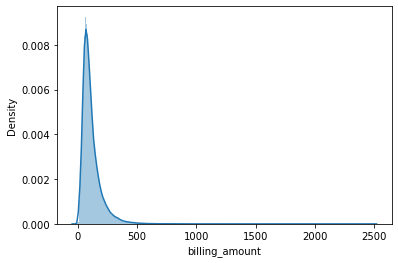

In [ ]:
sns.distplot(df["billing_amount"],bins = "auto")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='current_balance', ylabel='Density'>

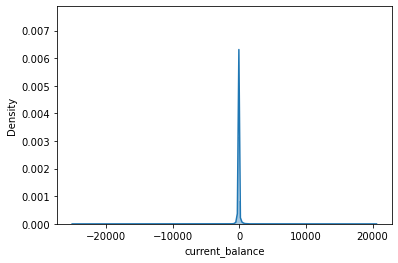

In [ ]:
sns.distplot(df["current_balance"],bins = "auto")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pge_account_months', ylabel='Density'>

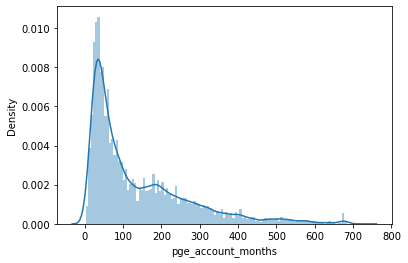

In [ ]:
sns.distplot(df["pge_account_months"],bins = "auto")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pge_customer_months', ylabel='Density'>

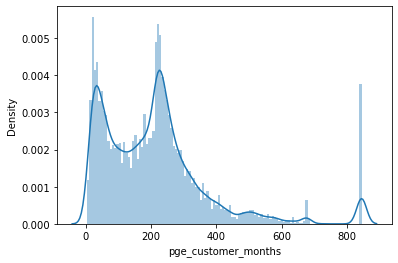

In [ ]:
sns.distplot(df["pge_customer_months"],bins = "auto")

In [ ]:
### box plots to check if there are any outliers in numerical variables ###
.plt.figure(figsize=(10,5))
sns.boxplot(data = df_summary)